In [1]:
!apt-get update
!apt-get install -y cmake build-essential pkg-config

!git clone https://github.com/opencv/opencv.git
!git clone https://github.com/opencv/opencv_contrib.git

!mkdir -p opencv/build
%cd opencv/build
!cmake -D CMAKE_BUILD_TYPE=RELEASE \
        -D CMAKE_INSTALL_PREFIX=/usr/local \
        -D OPENCV_ENABLE_NONFREE=ON \
        -D OPENCV_EXTRA_MODULES_PATH=../../opencv_contrib/modules \
        -D BUILD_EXAMPLES=OFF ..
!make -j8
!make install

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,595 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,445 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports/main amd64 Packages [81.4 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-backports/universe amd64 Packages [33.7 kB]
Get

In [2]:
import cv2

# Check OpenCV version
print(f"OpenCV version: {cv2.__version__}")

# Verify if SIFT is available
if cv2.SIFT_create:
    print("SIFT is available")
else:
    print("SIFT is NOT available")

# Verify if SURF is available (SURF is part of opencv_contrib)
if hasattr(cv2.xfeatures2d, 'SURF_create'):
    print("SURF is available")
else:
    print("SURF is NOT available")


OpenCV version: 4.10.0-dev
SIFT is available
SURF is available


# These Techniques Work on Any Type of Image:
**General Feature Detection:** Algorithms like SIFT, SURF, and ORB focus on keypoints—points of interest in an image that are distinct and stable under different transformations (such as scaling, rotation, or changes in lighting). These could be corners, edges, or other distinct patterns.

For sceneries, these keypoints might be rocks, trees, or mountains.
For human portraits, these keypoints might be facial features like eyes, nose, lips, or edges around hairlines.


# **SIFT (Scale-Invariant Feature Transform)**
 Algorithm to detect and compute keypoints and descriptors in the image.

Upload an image:


Saving BPE3.jpg to BPE3 (2).jpg


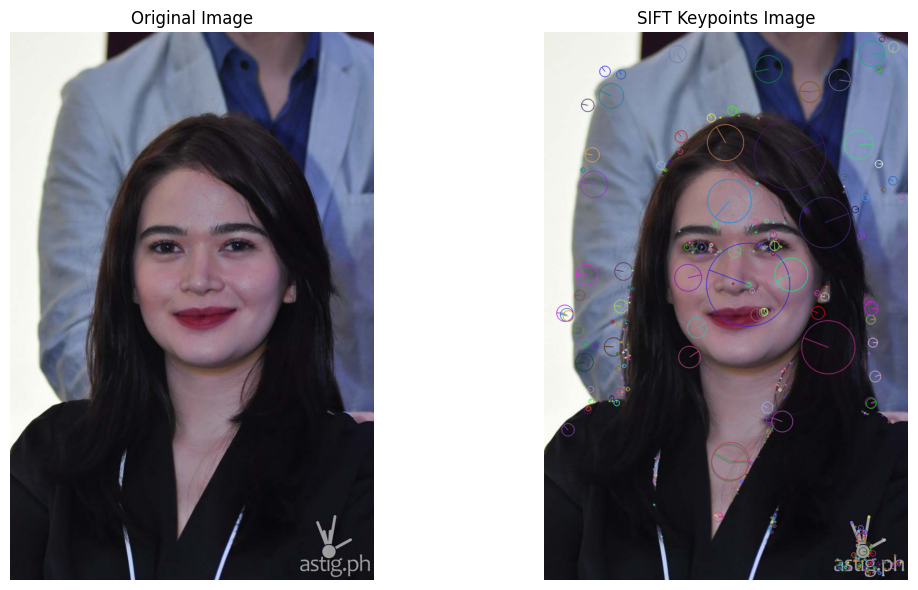

In [12]:
# Import necessary libraries
import cv2
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image
import numpy as np
from io import BytesIO

# Function to upload and load an image
def upload_image():
    print("Upload an image:")
    uploaded = files.upload()
    image_path = next(iter(uploaded))
    image = Image.open(BytesIO(uploaded[image_path]))
    return np.array(image)

# Step 1: Load the image
image = upload_image()

# Step 2: Convert the image to grayscale (SIFT works better on grayscale images)
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Step 3: Initialize SIFT detector
sift = cv2.SIFT_create()

# Step 4: Detect keypoints and compute descriptors
keypoints, descriptors = sift.detectAndCompute(gray_image, None)

# Step 5: Draw the keypoints with more interpretability (show scale and orientation)
sift_image = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Step 6: Display original and SIFT keypoints side by side
plt.figure(figsize=(12, 6))

# Display original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

# Display SIFT keypoints image
plt.subplot(1, 2, 2)
plt.imshow(sift_image)
plt.title("SIFT Keypoints Image")
plt.axis('off')

# Show both images
plt.tight_layout()
plt.show()


**SIFT Keypoints Image:** The processed image shows the keypoints identified by the SIFT algorithm.

These keypoints are marked as circles:

**Circle Size:** SIFT detects both small and large-scale features in the image.
*  Bigger circles mean the feature is bigger and visible even when zoomed out, while smaller circles represent finer details.

**Orientation:** Each keypoint also has a dominant direction (or orientation), which is indicated by the direction of the arrows inside the circles. This orientation makes SIFT robust to image rotations.





# SURF (Speeded-Up Robust Features) Feature Extraction

# SURF (Speeded-Up Robust Features)#
is patented and thus excluded in some versions of OpenCV, even though we have installed opencv-contrib-python.

Specifically, we would need to rebuild OpenCV with the OPENCV_ENABLE_NONFREE option enabled to use SURF.

In [ ]:
# Step 1: Update System and Install Required Build Tools
!apt-get update
!apt-get install -y cmake build-essential pkg-config

# Step 2: Install Required Libraries for Image Processing
!apt-get install -y libjpeg-dev libpng-dev libtiff-dev
!apt-get install -y libgtk-3-dev
!apt-get install -y libatlas-base-dev gfortran
!apt-get install -y python3-dev

# Step 3: Clone OpenCV and OpenCV Contrib Repositories
!git clone https://github.com/opencv/opencv.git
!git clone https://github.com/opencv/opencv_contrib.git

# Step 4: Create a Build Directory and Manually Change Directory Using Python (For Colab)
import os
os.makedirs("opencv_build", exist_ok=True)
os.chdir("opencv_build")

# Step 5: Configure the Build with CMake
!cmake -D CMAKE_BUILD_TYPE=RELEASE \
       -D CMAKE_INSTALL_PREFIX=/usr/local \
       -D OPENCV_ENABLE_NONFREE=ON \
       -D OPENCV_EXTRA_MODULES_PATH=../opencv_contrib/modules \
       -D BUILD_EXAMPLES=OFF ../opencv

# Step 6: Compile OpenCV (this will take some time)
!make -j$(nproc)

# Step 7: Install OpenCV
!make install
!ldconfig


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Ign:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading pack

Upload an image:


Saving BPE3.jpg to BPE3 (3).jpg
SURF is available and initialized.


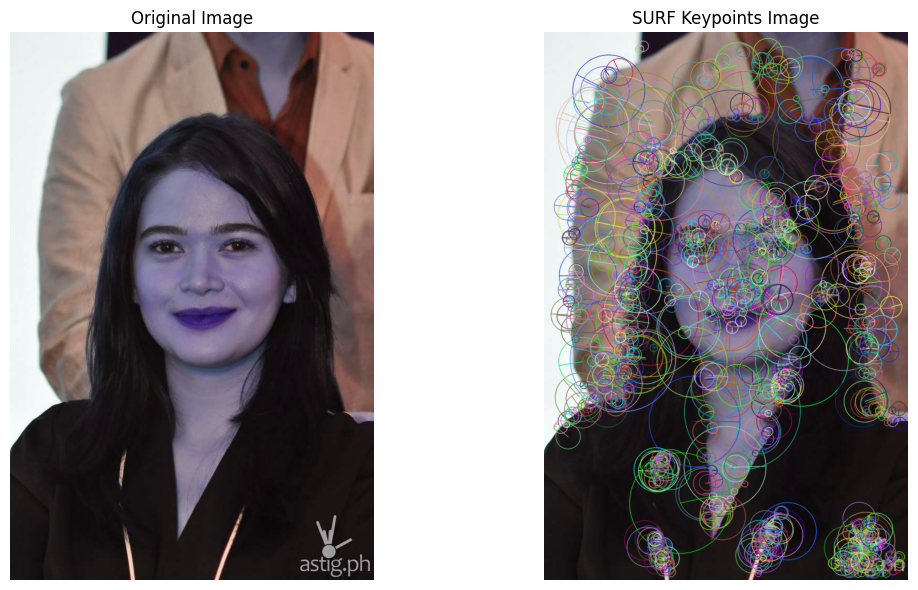

In [13]:
# Import necessary libraries
import cv2
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image
import numpy as np
from io import BytesIO

# Function to upload and load an image
def upload_image():
    print("Upload an image:")
    uploaded = files.upload()
    image_path = next(iter(uploaded))
    image = Image.open(BytesIO(uploaded[image_path]))
    return np.array(image)

# Step 1: Load the image
image = upload_image()
# Step 2: Convert the image to grayscale (SURF works better on grayscale images)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Check if SURF is available and initialize the SURF detector
if hasattr(cv2.xfeatures2d, 'SURF_create'):
    surf = cv2.xfeatures2d.SURF_create()
    print("SURF is available and initialized.")
else:
    print("SURF is not available. Ensure OpenCV is built with OPENCV_ENABLE_NONFREE=ON.")
    exit()

# Step 4: Detect keypoints and compute descriptors
keypoints, descriptors = surf.detectAndCompute(gray_image, None)

# Step 5: Draw the keypoints on the image
surf_image = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Step 6: Display original and SURF keypoints side by side
plt.figure(figsize=(12, 6))

# Display original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

# Display SURF keypoints image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(surf_image, cv2.COLOR_BGR2RGB))
plt.title("SURF Keypoints Image")
plt.axis('off')

# Show both images
plt.tight_layout()
plt.show()


# ORB (Oriented FAST and Rotated BRIEF) algorithm

Upload an image:


Saving BPE3.jpg to BPE3 (4).jpg


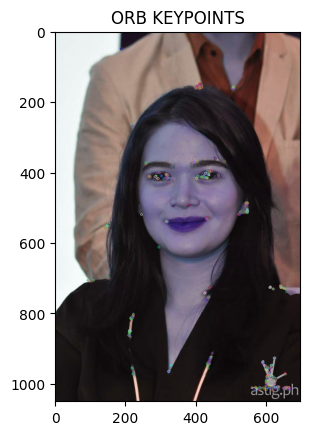

In [15]:

# Function to upload and load an image
def upload_image():
    print("Upload an image:")
    uploaded = files.upload()
    image_path = next(iter(uploaded))
    image = Image.open(BytesIO(uploaded[image_path]))
    return np.array(image)

# Step 1: Load the image
image = upload_image()

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initialize the ORB detector
orb = cv2.ORB_create()

# Detect keypoints and descriptors
keypoints, descriptors = orb.detectAndCompute(gray_image, None)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

# Display the result
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title("ORB KEYPOINTS")
plt.show()


**ORB** works by first detecting keypoints (important regions in an image like corners or edges) using the FAST algorithm.

 * These keypoints are then oriented to account for image rotation. The BRIEF descriptor is applied to generate binary descriptors, which are compact and allow for quick feature matching between images.

In simple terms, **ORB** finds important points in an image (like corners), remembers how they look (using descriptors), and is fast enough to be used in real-time applications. It can also recognize these points even if the image is rotated or slightly transformed.

# Feature Matching using SIFT: **Brute-Force Matcher**

Upload two images:


Saving BPE4.jpeg to BPE4 (4).jpeg
Saving BPE3.jpg to BPE3 (10).jpg


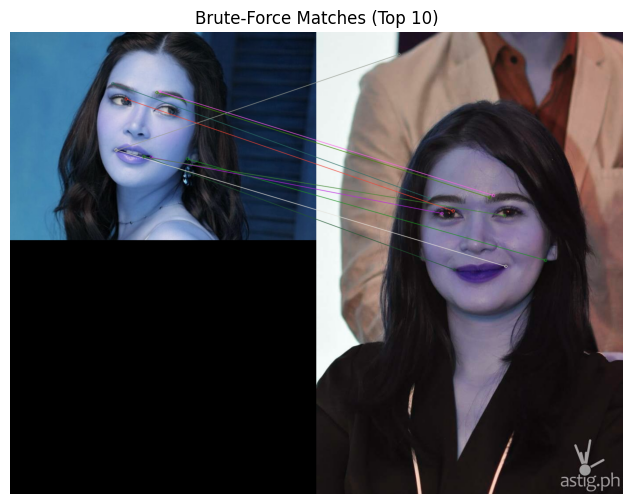

In [24]:
# Import necessary libraries
import cv2
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image
import numpy as np
from io import BytesIO

# Function to upload two images
def upload_images():
    print("Upload two images:")
    uploaded = files.upload()  # This will prompt for multiple images
    image_paths = list(uploaded.keys())

    # Load the two images
    image1 = Image.open(BytesIO(uploaded[image_paths[0]]))
    image2 = Image.open(BytesIO(uploaded[image_paths[1]]))

    # Convert to OpenCV format (numpy arrays)
    image1 = np.array(image1)
    image2 = np.array(image2)

    return image1, image2

# Step 1: Load two images
image1, image2 = upload_images()

# Convert images to grayscale
gray_image1 = cv2.cvtColor(image1, cv2.COLOR_RGB2GRAY)
gray_image2 = cv2.cvtColor(image2, cv2.COLOR_RGB2GRAY)

# Step 2: Detect keypoints and descriptors using ORB (or you can use SIFT/SURF)
orb = cv2.ORB_create()
keypoints1, descriptors1 = orb.detectAndCompute(gray_image1, None)
keypoints2, descriptors2 = orb.detectAndCompute(gray_image2, None)

# Step 3: Use Brute-Force matcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Step 4: Find matches between the descriptors of the two images
matches = bf.match(descriptors1, descriptors2)

# Sort them in the order of their distances (lower distance = better match)
matches = sorted(matches, key = lambda x: x.distance)

# Step 5: Draw matches on the images
matched_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Step 6: Display the matched keypoints
plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB))
plt.title("Brute-Force Matches (Top 10)")
plt.axis('off')
plt.show()


The **Brute-Force Matcher** is a simple algorithm that compares every descriptor from one image with every descriptor from another.

It finds the closest match by calculating the distance between descriptors. In feature matching, it helps connect keypoints from two images, showing which areas are similar or correspond to the same object.

In simpler terms, the Brute-Force Matcher looks at every important point in two images and matches them by finding the ones that look most alike. It helps identify which parts of the images are similar, even if the images are slightly different.

Upload two images:


Saving hgrphy2.jpg to hgrphy2 (1).jpg
Saving Hgrphy1.jpg to Hgrphy1 (1).jpg


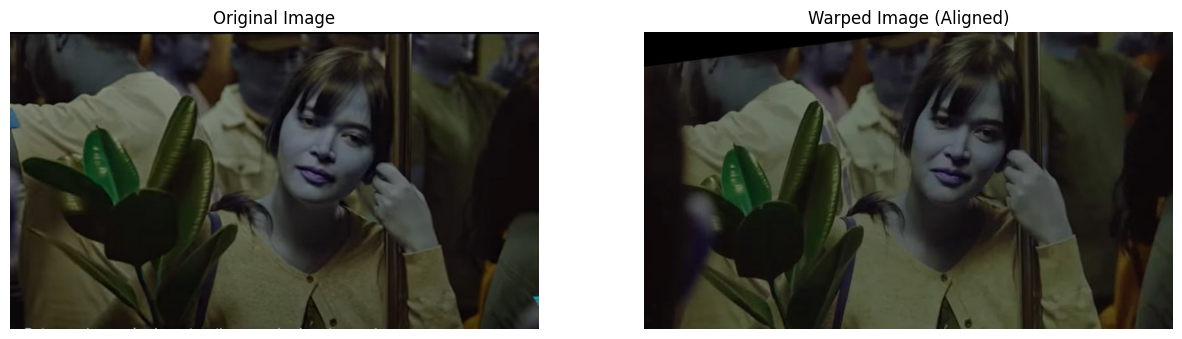

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to upload two images
def upload_images():
    print("Upload two images:")
    uploaded = files.upload()  # This will prompt for multiple images
    image_paths = list(uploaded.keys())

    # Load the two images
    image1 = Image.open(BytesIO(uploaded[image_paths[0]]))
    image2 = Image.open(BytesIO(uploaded[image_paths[1]]))

    # Convert to OpenCV format (numpy arrays)
    image1 = np.array(image1)
    image2 = np.array(image2)

    return image1, image2

# Step 1: Load two images
image1, image2 = upload_images()

# Step 2: Convert both images to grayscale
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Step 3: Detect keypoints and descriptors using SIFT
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

# Step 4: Use Brute-Force Matcher to find matches between descriptors
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

# Apply ratio test to filter good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Step 5: Extract location of good keypoints
if len(good_matches) > 10:
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

    # Step 6: Find the homography matrix
    H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    # Step 7: Warp one image to align with the other
    height, width, channels = image2.shape
    warped_image = cv2.warpPerspective(image1, H, (width, height))

    # Step 8: Display the original and aligned images
    plt.figure(figsize=(15, 10))

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')

    # Warped image aligned to the original
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(warped_image, cv2.COLOR_BGR2RGB))
    plt.title("Warped Image (Aligned)")
    plt.axis('off')

    plt.show()
else:
    print("Not enough matches are found - {}/10".format(len(good_matches)))
